# Convolutional Neural Networks: Application


<a name='1'></a>
## 1 - Packages



In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

<a name='1-1'></a>
### 1.1 - Load the Data and Split the Data into Train/Test Sets


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


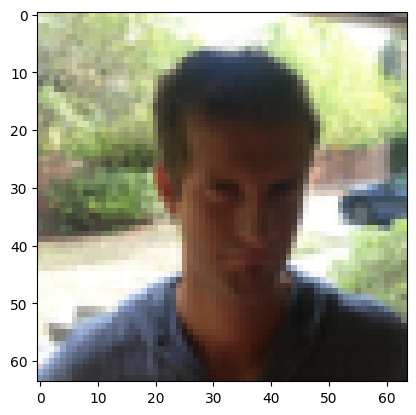

In [3]:
index = 11
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

<a name='2'></a>
## 2 - Layers in TF Keras 


<a name='3'></a>
## 3 - The Sequential API

 

<a name='3-1'></a>
### 3.1 - Create the Sequential Model

<a name='ex-1'></a>
### Exercise 1 - happyModel


In [4]:
# GRADED FUNCTION: happyModel

def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
        ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
        #tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),
        ## Conv2D with 32 7x7 filters and stride of 1
        #tfl.Conv2D(32, (7,7)),
        ## BatchNormalization for axis 3
        #tfl.BatchNormalization(axis=-1),
        ## ReLU
        #tfl.ReLU(),
        ## Max Pooling 2D with default parameters
        #tfl.MaxPOOL2D(),
        ## Flatten layer
        #tfl.flatten(),
        ## Dense layer with 1 unit for output & 'sigmoid' activation
        #tfl.Dense(1, activation='sigmoid')
        # YOUR CODE STARTS HERE
        tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),
        tfl.Conv2D(32, (7,7)),
        tfl.BatchNormalization(axis=-1),
        tfl.ReLU(),
        tfl.MaxPool2D(),
        tfl.Flatten(),
        tfl.Dense(1,activation='sigmoid')
        # YOUR CODE ENDS HERE
    ])
    return model

In [5]:
happy_model = happyModel()
# Print a summary for each layer
for layer in summary(happy_model):
    print(layer)
    
output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]
    
comparator(summary(happy_model), output)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


In [6]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [7]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

<a name='3-2'></a>
### 3.2 - Train and Evaluate the Model


In [8]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
19/19 [==============================] - 5s 278ms/step - loss: 1.2370 - accuracy: 0.6767
Epoch 2/10
19/19 [==============================] - 6s 339ms/step - loss: 0.2660 - accuracy: 0.8883
Epoch 3/10
19/19 [==============================] - 6s 328ms/step - loss: 0.1494 - accuracy: 0.9417
Epoch 4/10
19/19 [==============================] - 6s 290ms/step - loss: 0.1073 - accuracy: 0.9700
Epoch 5/10
19/19 [==============================] - 2s 112ms/step - loss: 0.0947 - accuracy: 0.9683
Epoch 6/10
19/19 [==============================] - 7s 374ms/step - loss: 0.0768 - accuracy: 0.9817
Epoch 7/10
19/19 [==============================] - 8s 400ms/step - loss: 0.0632 - accuracy: 0.9817
Epoch 8/10
19/19 [==============================] - 7s 389ms/step - loss: 0.0533 - accuracy: 0.9833
Epoch 9/10
19/19 [==============================] - 7s 393ms/step - loss: 0.0539 - accuracy: 0.9917
Epoch 10/10
19/19 [==============================] - 7s 390ms/step - loss: 0.0501 - accuracy: 0.9867

In [9]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 19ms/step - loss: 0.2958 - accuracy: 0.9400


[0.295820027589798, 0.9399999976158142]

<a name='4'></a>
## 4 - The Functional API

<a name='4-1'></a>
### 4.1 - Load the SIGNS Dataset



In [10]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 5


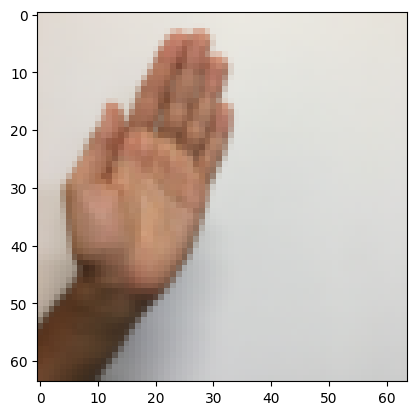

In [11]:
# Example of an image from the dataset
index = 13
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

<a name='4-2'></a>
### 4.2 - Split the Data into Train/Test Sets


In [12]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
# print(type(X_train))
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


<a name='4-3'></a>
### 4.3 - Forward Propagation


<a name='ex-2'></a>
### Exercise 2 - convolutional_model


In [13]:
# GRADED FUNCTION: convolutional_model

def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    # Z1 = None
    ## RELU
    # A1 = None
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    # P1 = None
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    # Z2 = None
    ## RELU
    # A2 = None
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    # P2 = None
    ## FLATTEN
    #F = None
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
    #output = None
    # YOUR CODE STARTS HERE
    Z1 = tfl.Conv2D(8, 4, activation='linear', padding="same", strides=1)(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)
    Z2 = tfl.Conv2D(16, 2, activation='linear', padding="same", strides=1)(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(6, activation='softmax')(F)
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [14]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
    
output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]
    
comparator(summary(conv_model), output)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_1 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_2 (ReLU)              (None, 8, 8, 16)          0         
                                                             

<a name='4-4'></a>
### 4.4 - Train the Model

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 3s 164ms/step - loss: 1.8634 - accuracy: 0.1639 - val_loss: 1.7993 - val_accuracy: 0.1750
Epoch 2/100
17/17 [==============================] - 3s 206ms/step - loss: 1.7943 - accuracy: 0.1778 - val_loss: 1.7946 - val_accuracy: 0.1417
Epoch 3/100
17/17 [==============================] - 4s 211ms/step - loss: 1.7891 - accuracy: 0.2102 - val_loss: 1.7891 - val_accuracy: 0.2083
Epoch 4/100
17/17 [==============================] - 4s 213ms/step - loss: 1.7844 - accuracy: 0.2241 - val_loss: 1.7856 - val_accuracy: 0.2000
Epoch 5/100
17/17 [==============================] - 4s 210ms/step - loss: 1.7811 - accuracy: 0.2194 - val_loss: 1.7826 - val_accuracy: 0.2083
Epoch 6/100
17/17 [==============================] - 3s 206ms/step - loss: 1.7772 - accuracy: 0.2398 - val_loss: 1.7796 - val_accuracy: 0.2083
Epoch 7/100
17/17 [==============================] - 4s 211ms/step - loss: 1.7738 - accuracy: 0.2574 - val_loss: 1.7762 - val_accuracy: 0.2417

<a name='5'></a>
## 5 - History Object 


In [16]:
history.history

{'loss': [1.8633939027786255,
  1.7942705154418945,
  1.7890808582305908,
  1.7844396829605103,
  1.7811108827590942,
  1.7772358655929565,
  1.7737911939620972,
  1.7704229354858398,
  1.766548752784729,
  1.762426495552063,
  1.7573635578155518,
  1.7511872053146362,
  1.7430434226989746,
  1.7336605787277222,
  1.72298264503479,
  1.7102062702178955,
  1.6953842639923096,
  1.6790145635604858,
  1.659407615661621,
  1.6377863883972168,
  1.6136804819107056,
  1.5878663063049316,
  1.5602118968963623,
  1.5316017866134644,
  1.5024120807647705,
  1.4741871356964111,
  1.4459348917007446,
  1.4177824258804321,
  1.390976905822754,
  1.3644534349441528,
  1.3381621837615967,
  1.3126109838485718,
  1.2889559268951416,
  1.265148401260376,
  1.2426226139068604,
  1.2207026481628418,
  1.1994014978408813,
  1.1787309646606445,
  1.1586602926254272,
  1.1395658254623413,
  1.1209383010864258,
  1.1029036045074463,
  1.0852875709533691,
  1.0688588619232178,
  1.0527313947677612,
  1.03781

Now visualize the loss over time using `history.history`: 

/tmp/ipykernel_84/973814028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
/tmp/ipykernel_84/973814028.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

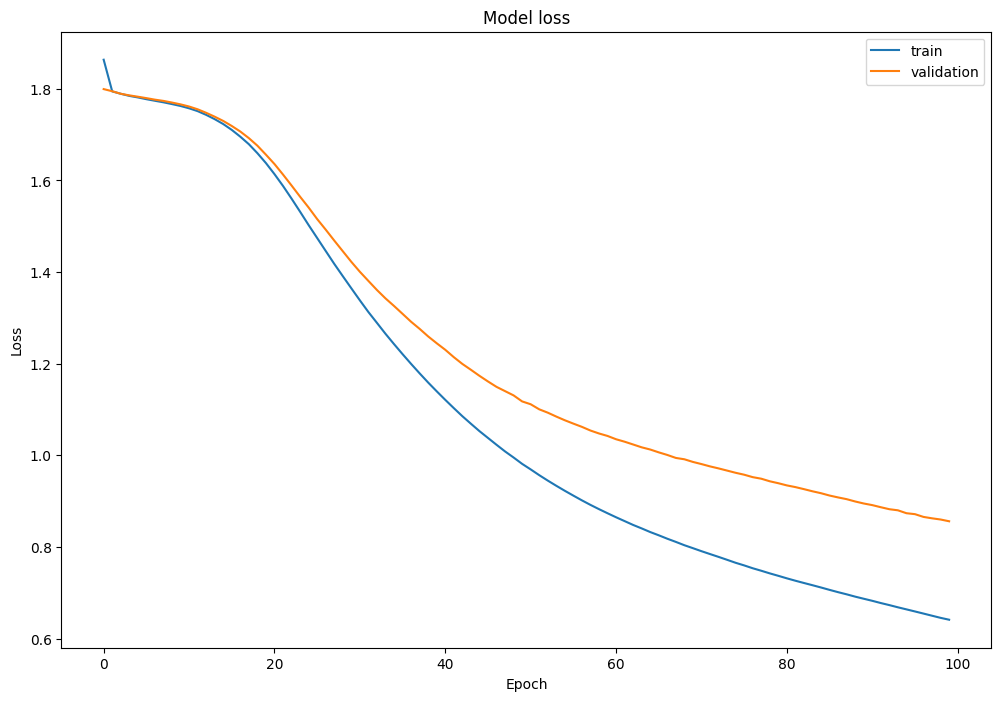

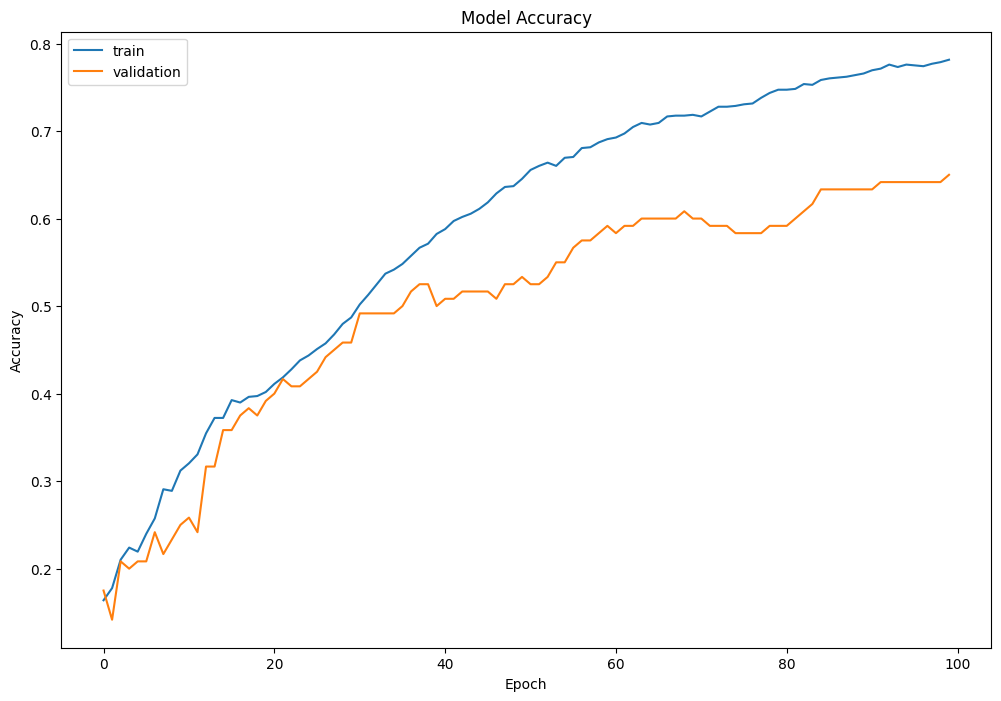

In [17]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')